<a href="https://colab.research.google.com/github/jefffang19/cv_hw/blob/master/cvHW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
path = F"/content/gdrive/My Drive/iir_training_python/cvHW/cv.png"

In [ ]:
img = cv2.imread(path)

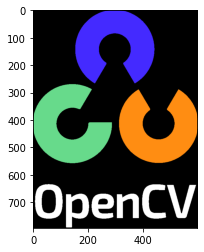

In [ ]:
plt.imshow(img)

# Objective


```
cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
```



In [ ]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

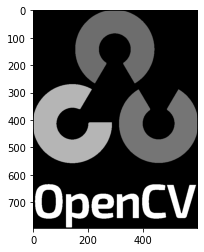

In [ ]:
plt.imshow(img_gray, cmap = 'gray')

# We implement above function ourself

In [ ]:
img.shape

(794, 600, 3)

# Get R, G, B channels

In [ ]:
imgR = img[..., 0] # R
imgG = img[..., 1] # G
imgB =img[..., 2] # B

In [ ]:
imgR.shape

(794, 600)

# transform to grayscale

In [ ]:
# elementwise multiply
img_gray = np.multiply(imgR,0.299) + np.multiply(imgG,0.587) + np.multiply(imgB,0.114)

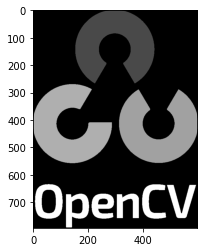

In [ ]:
plt.imshow(img_gray, cmap='gray')

# threshold function

# objective


```
cv2.threshold(x, low_bound, up_bound, cv2.THRESH_TOZERO)
```



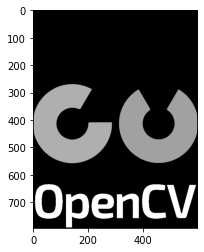

In [ ]:
ret,thresh1 = cv2.threshold(img_gray,127,255,cv2.THRESH_TOZERO)
plt.imshow(thresh1, cmap='gray')

# My Implementation

In [ ]:
path = F"/content/gdrive/My Drive/iir_training_python/cvHW/cv.png"

In [ ]:
def myThresh(in_img, lower_thresh, upper_thresh):
  if(0<=upper_thresh<=255 and 0<=lower_thresh<=255):
    up_th = np.less_equal(in_img, upper_thresh)
    low_th = np.greater(in_img, lower_thresh)
    return np.multiply(np.multiply(in_img,low_th), up_th)
  else:
    print('wrong value')

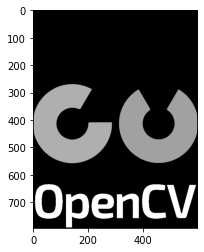

In [ ]:
result = myThresh(img_gray, 127, 255)

plt.imshow(result, cmap='gray')

In [ ]:
myThresh(img, 127, 278)

wrong value


# Segmentation Model

In [ ]:
!pip install -U segmentation-models

     |████████████████████████████████| 51kB 4.1MB/s 


In [ ]:
!pip install tensorflow-gpu==1.15.0

     |████████████████████████████████| 411.5MB 40kB/s 
     |████████████████████████████████| 512kB 42.1MB/s 
     |████████████████████████████████| 3.8MB 44.6MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=91769fa5b96bb276040d7a5f1135383ff41bb2daddf23214adb2fa4ee5f6c5d1
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.3.0 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorboard<3,>=2.3.0, but you'll have tensorboard 1.15.0 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorflow-estimator<2.4.0,>=2.3.0, but you'll have tensorflow-estimator 1.15.1 which is incompatible.
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalli

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'1.15.0'

In [ ]:
import segmentation_models as sm

Segmentation Models: using `tf.keras` framework.


# Set Model backbone

In [ ]:
model = sm.Unet(backbone_name='vgg16', encoder_weights='imagenet')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 6 1792        input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, None, None, 6 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, None, None, 6 0           block1_conv2[0][0]               
______________________________________________________________________________________________

# Test Fit Model

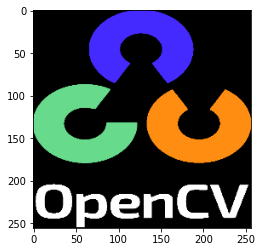

In [ ]:
# image size according to the decoder filter of the model -> (256,128,64,32,16)
x = cv2.resize(img, (256,256))
plt.imshow(x)

In [ ]:
# increase dimmension for batch_size
x = x[np.newaxis, :]
x.shape

(1, 256, 256, 3)

In [ ]:
predict_img = model.predict(x)

In [ ]:
p = predict_img.reshape((256,256))

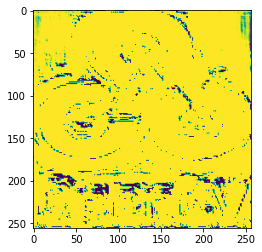

In [ ]:
plt.imshow(p)

In [ ]:
predict_img.shape

(1, 256, 256, 1)

In [ ]:
#overlap the predict img and the origin img
result = predict_img[0] + x[0]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


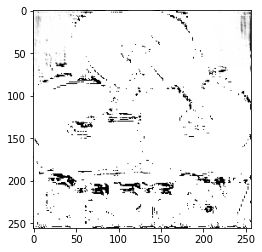

In [ ]:
plt.imshow(result)

In [ ]:
import glob

In [ ]:
!ls "/content/gdrive/My Drive/iir_training_python/cvHW/f01"

image  label  train_image  train_mask


# Import Training Data

In [ ]:
filenames = glob.glob(F"/content/gdrive/My Drive/iir_training_python/cvHW/f01/image/*.png")

In [ ]:
filenames.sort()
filenames

['/content/gdrive/My Drive/iir_training_python/cvHW/f01/image/0001.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/image/0002.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/image/0003.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/image/0004.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/image/0005.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/image/0006.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/image/0007.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/image/0008.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/image/0009.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/image/0010.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/image/0011.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/image/0012.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/image/0013.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW

In [ ]:
images = [cv2.imread(i) for i in filenames]

In [ ]:
# normalize
images = [i/255 for i in images] 

In [ ]:
#resize to fit model
images = [cv2.resize(i, (480,1152)) for i in images]

In [ ]:
images[0].shape

(1152, 480, 3)

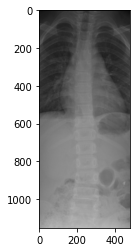

In [ ]:
plt.imshow(images[0])

# Import training Labels

In [ ]:
filenames = glob.glob(F"/content/gdrive/My Drive/iir_training_python/cvHW/f01/label/*.png")

In [ ]:
filenames.sort()
filenames

['/content/gdrive/My Drive/iir_training_python/cvHW/f01/label/0001.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/label/0002.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/label/0003.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/label/0004.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/label/0005.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/label/0006.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/label/0007.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/label/0008.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/label/0009.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/label/0010.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/label/0011.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/label/0012.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/label/0013.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW

In [ ]:
labels = [cv2.imread(i) for i in filenames]

In [ ]:
labels = [i/255 for i in labels]

In [ ]:
labels = [cv2.resize(i,(480,1152)) for i in labels]

In [ ]:
len(labels)

20

In [ ]:
labels[0].shape

(1152, 480, 3)

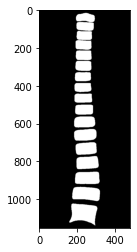

In [ ]:
plt.imshow(labels[0])

# Split Training and Testing

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
index_train, index_test = train_test_split(range(20),test_size=0.2, shuffle=True)

In [ ]:
index_train

[16, 2, 14, 1, 17, 7, 18, 19, 10, 3, 0, 12, 15, 9, 11, 5]

In [ ]:
index_test

[6, 4, 13, 8]

In [ ]:
# divide the imgs and labels
x_train = [images[i] for i in index_train]
x_test = [images[i] for i in index_test]
y_train = [labels[i] for i in index_train]
y_test = [labels[i] for i in index_test]

In [ ]:
# convert fit data into type numpy
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
y_test.shape

(4, 1152, 480, 3)

# save the reshaped training images and masks

In [ ]:
for i in range(len(x_train)):
  path = "/content/gdrive/My Drive/iir_training_python/cvHW/f01/train_image/class0/{:04d}.png".format(i)
  cv2.imwrite(path, x_train[i])
  path = "/content/gdrive/My Drive/iir_training_python/cvHW/f01/train_mask/class0/{:04d}.png".format(i)
  cv2.imwrite(path, y_train[i])

# data augmentation  (TBD)

In [ ]:
!pip install -U git+https://github.com/albumentations-team/albumentations

  Cloning https://github.com/albumentations-team/albumentations to /tmp/pip-req-build-rwvd1nuz
  Running command git clone -q https://github.com/albumentations-team/albumentations /tmp/pip-req-build-rwvd1nuz
     |████████████████████████████████| 952kB 8.9MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.6-cp36-none-any.whl size=66166 sha256=55a609dcd63f8e832ac0e22cc586b8210e06cd3eb37b3446c4c84fc716b3fb9c
  Stored in directory: /tmp/pip-ephem-wheel-cache-myt8vhd6/wheels/6f/77/82/86baf8aeda64a6de0f890cd0f2fb31acaf5545cc9c99ad21ba
Successfully built albumentations
  Found existing installation: imgaug 0.2.6
    Uninstalling imgaug-0.2.6:
      Successfully uninstalled imgaug-0.2.6
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [ ]:
#import libraries required

import albumentations as A
import random

In [ ]:
# augmentation function
def augment(aug, image, mask, num_aug):

    aug_img = []
    aug_mask = []

    for i in range(num_aug):
      augmented = aug(image=image, mask=mask)
      #change the grayscale image back to 3 channels
      aug_img.append(np.stack((augmented['image'],)*3,  axis=-1))
      aug_mask.append(np.stack((augmented['mask'],)*3,  axis=-1))

    return aug_img, aug_mask


In [ ]:
# Train Data Augmention

random.seed(42)

x_train_aug = []
y_train_aug = []

for i in range(len(x_train)):
  print('augment image and mask {}'.format(i))
  image = x_train[i]
  mask = y_train[i]

  # change the grayscale image to 1 channel
  _image = image[...,0]
  _mask = mask[...,0]

  # the transform matrix
  light = A.Compose([
      A.ShiftScaleRotate(),
      A.Blur(),
      A.GaussNoise(),
      A.ElasticTransform(),
      A.MaskDropout((10,15), p=1),
      A.Cutout(p=1)
  ],p=1)

  # get the augmentaion result
  n = 3
  aug_img, aug_mask = augment(light, _image, _mask, num_aug=n)
  print('created {} augmented image'.format(n))

  # append the original image
  aug_img.append(image)
  aug_mask.append(mask)

  if len(x_train_aug) == 0:
    x_train_aug = aug_img
    y_train_aug = aug_mask
  else:
    x_train_aug = x_train_aug + aug_img
    y_train_aug = y_train_aug + aug_mask
 

augment image and mask 0
created 3 augmented image
augment image and mask 1
created 3 augmented image
augment image and mask 2
created 3 augmented image
augment image and mask 3
created 3 augmented image
augment image and mask 4
created 3 augmented image
augment image and mask 5
created 3 augmented image
augment image and mask 6
created 3 augmented image
augment image and mask 7
created 3 augmented image
augment image and mask 8
created 3 augmented image
augment image and mask 9
created 3 augmented image
augment image and mask 10
created 3 augmented image
augment image and mask 11
created 3 augmented image
augment image and mask 12
created 3 augmented image
augment image and mask 13
created 3 augmented image
augment image and mask 14
created 3 augmented image
augment image and mask 15
created 3 augmented image


In [ ]:
len(x_train_aug)

64

In [ ]:
x_train_aug = np.array(x_train_aug)
y_train_aug = np.array(y_train_aug)

In [ ]:
print(x_train_aug.shape)
print(y_train_aug.shape)

(64, 1152, 480, 3)
(64, 1152, 480, 3)


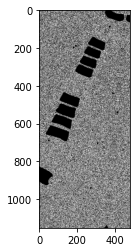

In [ ]:
plt.imshow(x_train_aug[0])

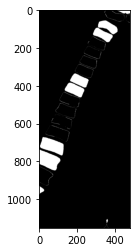

In [ ]:
plt.imshow(y_train_aug[0])

# Create Generator (DO NOT RUN)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

The structure of the filepath generator need to be



```
main_directory/
...class_a/
......a_image_1.jpg
......a_image_2.jpg
...class_b/
......b_image_1.jpg
......b_image_2.jpg
```



In [ ]:
# we need to create 2 augmentation generator, and they must take same augument
data_gen_args = dict(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.3)

image_aug_gen = ImageDataGenerator(**data_gen_args)
label_aug_gen = ImageDataGenerator(**data_gen_args)

In [ ]:
# fit the data Augmentation
image_aug_gen.fit(x_train)
label_aug_gen.fit(y_train)

In [ ]:
# provide same seed
seed = 1

image_generator = image_aug_gen.flow_from_directory(
    '/content/gdrive/My Drive/iir_training_python/cvHW/f01/train_image',
    target_size=(1152,480),
    batch_size=4,
    class_mode=None,
    seed=seed,
    subset='training')
valid_image_generator = image_aug_gen.flow_from_directory(
    '/content/gdrive/My Drive/iir_training_python/cvHW/f01/train_image',
    target_size=(1152,480),
    batch_size=4,
    class_mode=None,
    seed=seed,
    subset='validation')
mask_generator = label_aug_gen.flow_from_directory(
    '/content/gdrive/My Drive/iir_training_python/cvHW/f01/train_mask',
    target_size=(1152,480),
    batch_size=4,
    class_mode=None,
    seed=seed,
    subset='training')
valid_mask_generator = label_aug_gen.flow_from_directory(
    '/content/gdrive/My Drive/iir_training_python/cvHW/f01/train_mask',
    target_size=(1152,480),
    batch_size=4,
    class_mode=None,
    seed=seed,
    subset='validation')

Found 12 images belonging to 1 classes.
Found 4 images belonging to 1 classes.
Found 12 images belonging to 1 classes.
Found 4 images belonging to 1 classes.


In [ ]:
im = []
la = []
for i in range(5):
  ibatch = image_generator.next()
  vbatch = mask_generator.next()
  if(i==4):
    im = ibatch[3]
    la = vbatch[3]
    break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


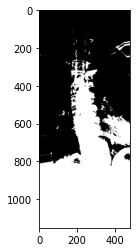

In [ ]:
plt.imshow(im)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


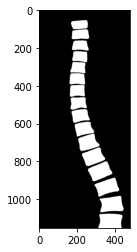

In [ ]:
plt.imshow(la)

In [ ]:
def combine_generator(gen1, gen2):
    while True:
        yield(next(gen1), next(gen2))
#combine
train_aug_gen = combine_generator(image_generator, mask_generator)
valid_aug_gen = combine_generator(valid_image_generator, valid_mask_generator)

# Fit model

In [ ]:
# model save path
my_model_fit_callback = [
  tf.keras.callbacks.ModelCheckpoint(filepath='/content/gdrive/My Drive/iir_training_python/cvHW/save_model/model.{epoch:02d}-{val_loss:.2f}.h5', save_best_only=True),
]

In [ ]:
model = sm.Unet(backbone_name='resnet50', encoder_weights='imagenet')

94593024/94592056 [==============================] - 9s 0us/step


In [ ]:
model.compile(
    'Adam',
    loss=sm.losses.bce_jaccard_loss,
    metrics=[sm.metrics.iou_score],
)

In [ ]:
model.fit_generator(
    train_aug_gen,
    steps_per_epoch=3,
    epochs=50,
    callbacks=my_model_fit_callback,
    validation_data = valid_aug_gen,
    validation_steps=1)

NameError: ignored

In [ ]:
model.fit(x=x_train_aug, y=y_train_aug, batch_size=4, epochs=120, validation_split=0.25, callbacks=my_model_fit_callback)

Train on 48 samples, validate on 16 samples
Epoch 1/120
48/48 [==============================] - 66s 1s/sample - loss: 1.3272 - iou_score: 0.1335 - val_loss: 3.0625 - val_iou_score: 0.0029
Epoch 2/120
48/48 [==============================] - 13s 271ms/sample - loss: 1.0551 - iou_score: 0.2219 - val_loss: 1429.2161 - val_iou_score: 0.0830
Epoch 3/120
48/48 [==============================] - 13s 275ms/sample - loss: 0.9830 - iou_score: 0.2472 - val_loss: 4536.9777 - val_iou_score: 0.0047
Epoch 4/120
48/48 [==============================] - 13s 271ms/sample - loss: 0.8654 - iou_score: 0.3501 - val_loss: 1696.7126 - val_iou_score: 0.0454
Epoch 5/120
48/48 [==============================] - 13s 268ms/sample - loss: 0.7974 - iou_score: 0.3974 - val_loss: 456.3159 - val_iou_score: 0.0095
Epoch 6/120
48/48 [==============================] - 13s 265ms/sample - loss: 0.7262 - iou_score: 0.4499 - val_loss: 132.3852 - val_iou_score: 3.3582e-04
Epoch 7/120
48/48 [==============================] - 1

# Caculate IoU

In [ ]:
model.evaluate(x=x_test, y=y_test)

4/4 [==============================] - 0s 78ms/sample - loss: 0.4012 - iou_score: 0.8019


[0.40124428272247314, 0.80187815]

In [ ]:
for i in range(len(x_test)):
  print(model.evaluate(x=x_test[i][np.newaxis, :], y=y_test[i][np.newaxis, :]))

1/1 [==============================] - 1s 907ms/sample - loss: 0.7641 - iou_score: 0.6559
[0.7641079425811768, 0.6559387]
1/1 [==============================] - 0s 68ms/sample - loss: 0.2119 - iou_score: 0.8827
[0.21193599700927734, 0.88267976]
1/1 [==============================] - 0s 69ms/sample - loss: 0.3022 - iou_score: 0.8473
[0.3021880090236664, 0.8472988]
1/1 [==============================] - 0s 68ms/sample - loss: 0.3198 - iou_score: 0.8285
[0.3198019862174988, 0.8285386]


#Test Predict

In [ ]:
test_img = x_test[1][np.newaxis, :]

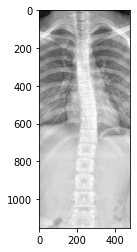

In [ ]:
plt.imshow(test_img[0])

In [ ]:
predict_img = model.predict(test_img)

In [ ]:
p = predict_img.reshape((1152,480))

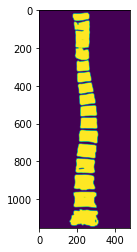

In [ ]:
plt.imshow(p)

In [ ]:
p = cv2.cvtColor(p, cv2.COLOR_GRAY2RGB)
p.shape

(1152, 480, 3)

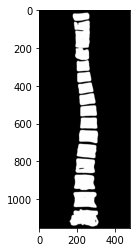

In [ ]:
plt.imshow(p)

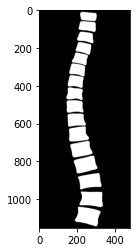

In [ ]:
plt.imshow(y_test[0])

In [ ]:
show_img = predict_img[0] + test_img[0]

In [ ]:
show_img.shape

(960, 480, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


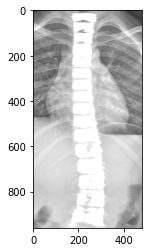

In [ ]:
plt.imshow(show_img)

In [ ]:
#load model
#if wish to futher train the model
model = tf.keras.models.load_model('/content/gdrive/My Drive/iir_training_python/cvHW/save_model/unet_resnet50/model.103-0.60.h5', custom_objects={'binary_crossentropy_plus_jaccard_loss':sm.losses.bce_jaccard_loss, 'iou_score':sm.metrics.iou_score})
#if inference only
#model = tf.keras.models.load_model("/content/gdrive/My Drive/iir_training_python/cvHW/save_model/unet_vgg16/model.120-0.71.h5", compile=False)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


# Testing Datas

In [ ]:
import glob

In [ ]:
test_images_names = glob.glob(F"/content/gdrive/My Drive/iir_training_python/cvHW/f03/image/*.png")
test_labels_names = glob.glob(F"/content/gdrive/My Drive/iir_training_python/cvHW/f03/label/*.png")

In [ ]:
test_labels_names.sort()
test_images_names.sort()

In [ ]:
images = [cv2.imread(i) for i in test_images_names]
images = [i/255 for i in images] #normalize
images = [cv2.resize(i, (480,1152)) for i in images]

In [ ]:
labels = [cv2.imread(i) for i in test_labels_names]
labels = [i/255 for i in labels] #normalize
labels = [cv2.resize(i, (480,1152)) for i in labels]

# evaluate testing iou

In [ ]:
model.evaluate(np.array(images), np.array(labels))

20/20 [==============================] - 1s 62ms/sample - loss: 0.6195 - iou_score: 0.7111


[0.6195416450500488, 0.71112674]

In [ ]:
for i in range(len(images)):
  print('image {}:'.format(i))
  model.evaluate(np.array(images[i])[np.newaxis,:], np.array(labels[i])[np.newaxis,:])

image 0:
1/1 [==============================] - 0s 63ms/sample - loss: 0.4363 - iou_score: 0.7926
image 1:
1/1 [==============================] - 0s 64ms/sample - loss: 1.9412 - iou_score: 0.2755
image 2:
1/1 [==============================] - 0s 64ms/sample - loss: 0.2465 - iou_score: 0.8677
image 3:
1/1 [==============================] - 0s 65ms/sample - loss: 1.3749 - iou_score: 0.4321
image 4:
1/1 [==============================] - 0s 65ms/sample - loss: 0.6422 - iou_score: 0.6945
image 5:
1/1 [==============================] - 0s 65ms/sample - loss: 0.4592 - iou_score: 0.7679
image 6:
1/1 [==============================] - 0s 64ms/sample - loss: 0.7921 - iou_score: 0.6438
image 7:
1/1 [==============================] - 0s 64ms/sample - loss: 0.3028 - iou_score: 0.8386
image 8:
1/1 [==============================] - 0s 64ms/sample - loss: 1.5994 - iou_score: 0.3691
image 9:
1/1 [==============================] - 0s 64ms/sample - loss: 0.2324 - iou_score: 0.8719
image 10:
1/1 [=====

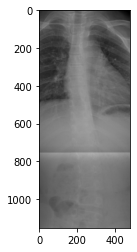

In [ ]:
plt.imshow(images[1])

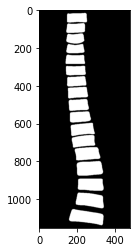

In [ ]:
plt.imshow(labels[1])

In [ ]:
test_img = images[1][np.newaxis, :]

In [ ]:
r = model.predict(test_img)

In [ ]:
r.shape

(1, 1152, 480, 1)

In [ ]:
p = r.reshape((1152,480))

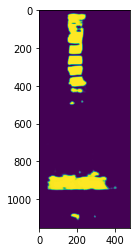

In [ ]:
plt.imshow(p)

# Convert img from float to uint8

In [ ]:
img

array([[[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [255,   0,   0]],

       ...,

       [[255,   0,   0],
        [  1,   1,   1],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]]

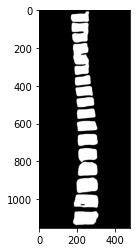

In [ ]:
img = p*255 #convert image from float(0~1) to int(0~255)
img = img.astype(np.uint8)
img = np.stack((img,) * 3, axis=-1)

plt.imshow(img)

# WaterShed

In [ ]:
meanshif = cv2.pyrMeanShiftFiltering(img, 21, 51)
gray = cv2.cvtColor(meanshif, cv2.COLOR_RGB2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

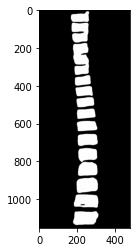

In [ ]:
plt.imshow(meanshif)

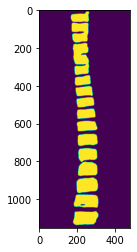

In [ ]:
plt.imshow(thresh)

In [ ]:
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 3)

sure_bg = cv2.erode(opening, kernel, iterations = 4)
#sure_bg = cv2.dilate(opening, kernel, iterations = 2)

dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 0)
ret, sure_fg = cv2.threshold(dist_transform, 0.3 * dist_transform.max(), 255, 0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

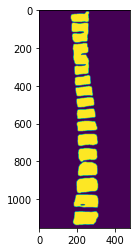

In [ ]:
plt.imshow(opening)

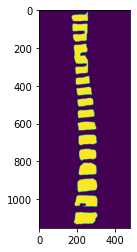

In [ ]:
plt.imshow(sure_bg)

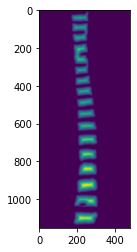

In [ ]:
plt.imshow(dist_transform)

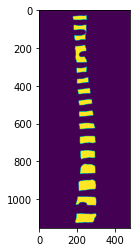

In [ ]:
plt.imshow(sure_fg)

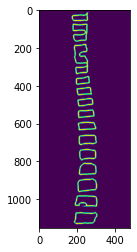

In [ ]:
plt.imshow(unknown)

In [ ]:
ret, markers = cv2.connectedComponents(sure_fg)
print(np.unique(markers))
markers = markers+1
print(np.unique(markers))

markers[unknown==255] = 0

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


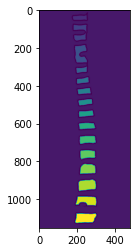

In [ ]:
plt.imshow(markers)

In [ ]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

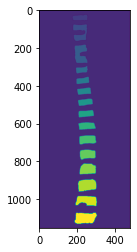

In [ ]:
plt.imshow(markers)

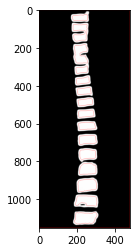

In [ ]:
plt.imshow(img)

In [ ]:
np.unique(markers)

array([-1,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=int32)

In [ ]:
import imutils
for label in np.unique(markers)[2:]:
	# 如果該標籤爲0，則表示其爲背景，直接忽略
	if label == 0:
		continue

	# 爲標籤區域分配內存並將在mask上繪製結果
	mask = np.zeros(gray.shape, dtype="uint8")
	mask[markers == label] = 255

	# 在mask上檢測輪廓並獲得最大的一個輪廓
	cnts, heir = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
	cv2.drawContours(img, cnts, -1, (255, 0, 0), cv2.FILLED)

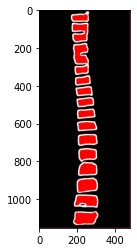

In [ ]:
plt.imshow(img)